# Importing Libraries 

In [1]:
#import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_score,f1_score,recall_score,fbeta_score
from sklearn.metrics import accuracy_score,roc_curve, precision_recall_curve, make_scorer, average_precision_score
from scipy.stats import pearsonr
from scipy.stats import skew

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier


In [2]:
#To print multiple outputs together
from __future__ import print_function

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Change column display number during print
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth',-1)

import warnings
warnings.filterwarnings("ignore")

sns.set()
%matplotlib inline

# Load files created using Feature Engineering script

In [3]:
#Load the files created using Feature Engineering
data_train_Xy = pd.read_csv("file\\train_Xy.csv")
data_val_Xy = pd.read_csv("file\\val_Xy.csv")
data_test_x = pd.read_csv("file\\test_x.csv")

In [4]:
data_train_Xy.drop(["Unnamed: 0","ID"],axis=1,inplace=True)
data_train_Xy

,Age,Age_Duration,Age_Duration_WO_Outliers,Age_WO_Outliers,Age_interval,Agency,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_CatBenc,Agency_Countenc,Agency_EPX,Agency_JWT,Agency_JZI,Agency_JamesSenc,Agency_KML,Agency_LOOenc,Agency_LWC,Agency_Mestenc,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Targetenc,Agency_Type,Agency_Type_Airlines,Agency_Type_CatBenc,Agency_Type_Countenc,Agency_Type_JamesSenc,Agency_Type_LOOenc,Agency_Type_Mestenc,Agency_Type_Targetenc,Agency_Type_Travel Agency,Agency_Type_WOEenc,Agency_Type_mean_target,Agency_WOEenc,Agency_mean_target,Commision,Commision_WO_outliers,Destination,Destination_ARGENTINA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BELARUS,Destination_BELGIUM,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_CAMBODIA,Destination_CANADA,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_CatBenc,Destination_Countenc,Destination_DENMARK,Destination_EGYPT,Destination_ESTONIA,Destination_ETHIOPIA,Destination_FIJI,Destination_FINLAND,Destination_FRANCE,Destination_GEORGIA,Destination_GERMANY,Destination_GREECE,Destination_GUAM,Destination_HONG KONG,Destination_HUNGARY,Destination_ICELAND,Destination_INDIA,Destination_INDONESIA,Destination_IRELAND,Destination_ISRAEL,Destination_ITALY,Destination_JAPAN,Destination_JORDAN,Destination_JamesSenc,Destination_KAZAKHSTAN,Destination_KENYA,"Destination_KOREA, REPUBLIC OF",Destination_KUWAIT,Destination_KYRGYZSTAN,Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,Destination_LEBANON,Destination_LITHUANIA,Destination_LOOenc,Destination_LUXEMBOURG,Destination_MACAO,Destination_MALAYSIA,Destination_MALDIVES,Destination_MALTA,Destination_MAURITIUS,Destination_MEXICO,Destination_MONGOLIA,Destination_MOROCCO,Destination_MYANMAR,Destination_Mestenc,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_Targetenc,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_WOEenc,Destination_ZAMBIA,Destination_mean_target,Distribution_Channel,Distribution_Channel_CatBenc,Distribution_Channel_Countenc,Distribution_Channel_JamesSenc,Distribution_Channel_LOOenc,Distribution_Channel_Mestenc,Distribution_Channel_Offline,Distribution_Channel_Online,Distribution_Channel_Targetenc,Distribution_Channel_WOEenc,Distribution_Channel_mean_target,Duration,Duration_Sq,Duration_WO_Outliers,Duration_WO_Outliers_Sq,Net_Sales,Net_Sales_WO_outliers,Product_Name,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_CatBenc,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Countenc,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_JamesSenc,Product_Name_LOOenc,Product_Name_Mestenc,Product_Name_Premier Plan,Product_Nam

In [5]:
data_val_Xy.drop(["Unnamed: 0","ID"],axis=1,inplace=True)
data_val_Xy

,Age,Age_Duration,Age_Duration_WO_Outliers,Age_WO_Outliers,Age_interval,Agency,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_CatBenc,Agency_Countenc,Agency_EPX,Agency_JWT,Agency_JZI,Agency_JamesSenc,Agency_KML,Agency_LOOenc,Agency_LWC,Agency_Mestenc,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Targetenc,Agency_Type,Agency_Type_Airlines,Agency_Type_CatBenc,Agency_Type_Countenc,Agency_Type_JamesSenc,Agency_Type_LOOenc,Agency_Type_Mestenc,Agency_Type_Targetenc,Agency_Type_Travel Agency,Agency_Type_WOEenc,Agency_Type_mean_target,Agency_WOEenc,Agency_mean_target,Commision,Commision_WO_outliers,Destination,Destination_ARGENTINA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BELARUS,Destination_BELGIUM,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_CAMBODIA,Destination_CANADA,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_CatBenc,Destination_Countenc,Destination_DENMARK,Destination_EGYPT,Destination_ESTONIA,Destination_ETHIOPIA,Destination_FIJI,Destination_FINLAND,Destination_FRANCE,Destination_GEORGIA,Destination_GERMANY,Destination_GREECE,Destination_GUAM,Destination_HONG KONG,Destination_HUNGARY,Destination_ICELAND,Destination_INDIA,Destination_INDONESIA,Destination_IRELAND,Destination_ISRAEL,Destination_ITALY,Destination_JAPAN,Destination_JORDAN,Destination_JamesSenc,Destination_KAZAKHSTAN,Destination_KENYA,"Destination_KOREA, REPUBLIC OF",Destination_KUWAIT,Destination_KYRGYZSTAN,Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,Destination_LEBANON,Destination_LITHUANIA,Destination_LOOenc,Destination_LUXEMBOURG,Destination_MACAO,Destination_MALAYSIA,Destination_MALDIVES,Destination_MALTA,Destination_MAURITIUS,Destination_MEXICO,Destination_MONGOLIA,Destination_MOROCCO,Destination_MYANMAR,Destination_Mestenc,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_Targetenc,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_WOEenc,Destination_ZAMBIA,Destination_mean_target,Distribution_Channel,Distribution_Channel_CatBenc,Distribution_Channel_Countenc,Distribution_Channel_JamesSenc,Distribution_Channel_LOOenc,Distribution_Channel_Mestenc,Distribution_Channel_Offline,Distribution_Channel_Online,Distribution_Channel_Targetenc,Distribution_Channel_WOEenc,Distribution_Channel_mean_target,Duration,Duration_Sq,Duration_WO_Outliers,Duration_WO_Outliers_Sq,Net_Sales,Net_Sales_WO_outliers,Product_Name,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_CatBenc,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Countenc,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_JamesSenc,Product_Name_LOOenc,Product_Name_Mestenc,Product_Name_Premier Plan,Product_Nam

In [6]:
data_test_x.drop(["Unnamed: 0"],axis=1,inplace=True)   #ID is required in data_test_x for creating submission file
data_test_x

,ID,Age,Age_Duration,Age_Duration_WO_Outliers,Age_WO_Outliers,Age_interval,Agency,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_CatBenc,Agency_Countenc,Agency_EPX,Agency_JWT,Agency_JZI,Agency_JamesSenc,Agency_KML,Agency_LOOenc,Agency_LWC,Agency_Mestenc,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Targetenc,Agency_Type,Agency_Type_Airlines,Agency_Type_CatBenc,Agency_Type_Countenc,Agency_Type_JamesSenc,Agency_Type_LOOenc,Agency_Type_Mestenc,Agency_Type_Targetenc,Agency_Type_Travel Agency,Agency_Type_WOEenc,Agency_Type_mean_target,Agency_WOEenc,Agency_mean_target,Commision,Commision_WO_outliers,Destination,Destination_ARGENTINA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BELARUS,Destination_BELGIUM,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_CAMBODIA,Destination_CANADA,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_CatBenc,Destination_Countenc,Destination_DENMARK,Destination_EGYPT,Destination_ESTONIA,Destination_ETHIOPIA,Destination_FIJI,Destination_FINLAND,Destination_FRANCE,Destination_GEORGIA,Destination_GERMANY,Destination_GREECE,Destination_GUAM,Destination_HONG KONG,Destination_HUNGARY,Destination_ICELAND,Destination_INDIA,Destination_INDONESIA,Destination_IRELAND,Destination_ISRAEL,Destination_ITALY,Destination_JAPAN,Destination_JORDAN,Destination_JamesSenc,Destination_KAZAKHSTAN,Destination_KENYA,"Destination_KOREA, REPUBLIC OF",Destination_KUWAIT,Destination_KYRGYZSTAN,Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,Destination_LEBANON,Destination_LITHUANIA,Destination_LOOenc,Destination_LUXEMBOURG,Destination_MACAO,Destination_MALAYSIA,Destination_MALDIVES,Destination_MALTA,Destination_MAURITIUS,Destination_MEXICO,Destination_MONGOLIA,Destination_MOROCCO,Destination_MYANMAR,Destination_Mestenc,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_Targetenc,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_WOEenc,Destination_ZAMBIA,Destination_mean_target,Distribution_Channel,Distribution_Channel_CatBenc,Distribution_Channel_Countenc,Distribution_Channel_JamesSenc,Distribution_Channel_LOOenc,Distribution_Channel_Mestenc,Distribution_Channel_Offline,Distribution_Channel_Online,Distribution_Channel_Targetenc,Distribution_Channel_WOEenc,Distribution_Channel_mean_target,Duration,Duration_Sq,Duration_WO_Outliers,Duration_WO_Outliers_Sq,Net_Sales,Net_Sales_WO_outliers,Product_Name,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_CatBenc,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Countenc,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_JamesSenc,Product_Name_LOOenc,Product_Name_Mestenc,Product_Name_Premier Plan,Product_

In [7]:
data_train_Xy.replace([np.nan,np.inf,-np.inf],0,inplace = True)

In [8]:
data_val_Xy.replace([np.nan,np.inf,-np.inf],0,inplace = True)

In [9]:
data_test_x.replace([np.nan,np.inf,-np.inf],0,inplace = True)

# Create colsets for Target Encoding, OHE and Derived features

In [11]:
list(data_test_x.columns) # all_cols

['ID',
 'Age',
 'Age_Duration',
 'Age_Duration_WO_Outliers',
 'Age_WO_Outliers',
 'Age_interval',
 'Agency',
 'Agency_ADM',
 'Agency_ART',
 'Agency_C2B',
 'Agency_CBH',
 'Agency_CCR',
 'Agency_CSR',
 'Agency_CWT',
 'Agency_CatBenc',
 'Agency_Countenc',
 'Agency_EPX',
 'Agency_JWT',
 'Agency_JZI',
 'Agency_JamesSenc',
 'Agency_KML',
 'Agency_LOOenc',
 'Agency_LWC',
 'Agency_Mestenc',
 'Agency_RAB',
 'Agency_SSI',
 'Agency_TST',
 'Agency_TTW',
 'Agency_Targetenc',
 'Agency_Type',
 'Agency_Type_Airlines',
 'Agency_Type_CatBenc',
 'Agency_Type_Countenc',
 'Agency_Type_JamesSenc',
 'Agency_Type_LOOenc',
 'Agency_Type_Mestenc',
 'Agency_Type_Targetenc',
 'Agency_Type_Travel Agency',
 'Agency_Type_WOEenc',
 'Agency_Type_mean_target',
 'Agency_WOEenc',
 'Agency_mean_target',
 'Commision',
 'Commision_WO_outliers',
 'Destination',
 'Destination_ARGENTINA',
 'Destination_AUSTRALIA',
 'Destination_AUSTRIA',
 'Destination_AZERBAIJAN',
 'Destination_BAHRAIN',
 'Destination_BANGLADESH',
 'Destinatio

In [12]:
all_cols = [[
'ID',
 'Age',
 'Age_Duration',
 'Age_Duration_WO_Outliers',
 'Age_WO_Outliers',
 'Age_interval',
 'Agency',
 'Agency_ADM',
 'Agency_ART',
 'Agency_C2B',
 'Agency_CBH',
 'Agency_CCR',
 'Agency_CSR',
 'Agency_CWT',
 'Agency_CatBenc',
 'Agency_Countenc',
 'Agency_EPX',
 'Agency_JWT',
 'Agency_JZI',
 'Agency_JamesSenc',
 'Agency_KML',
 'Agency_LOOenc',
 'Agency_LWC',
 'Agency_Mestenc',
 'Agency_RAB',
 'Agency_SSI',
 'Agency_TST',
 'Agency_TTW',
 'Agency_Targetenc',
 'Agency_Type',
 'Agency_Type_Airlines',
 'Agency_Type_CatBenc',
 'Agency_Type_Countenc',
 'Agency_Type_JamesSenc',
 'Agency_Type_LOOenc',
 'Agency_Type_Mestenc',
 'Agency_Type_Targetenc',
 'Agency_Type_Travel Agency',
 'Agency_Type_WOEenc',
 'Agency_Type_mean_target',
 'Agency_WOEenc',
 'Agency_mean_target',
 'Commision',
 'Commision_WO_outliers',
 'Destination',
 'Destination_ARGENTINA',
 'Destination_AUSTRALIA',
 'Destination_AUSTRIA',
 'Destination_AZERBAIJAN',
 'Destination_BAHRAIN',
 'Destination_BANGLADESH',
 'Destination_BELARUS',
 'Destination_BELGIUM',
 'Destination_BERMUDA',
 'Destination_BHUTAN',
 'Destination_BOLIVIA',
 'Destination_BRAZIL',
 'Destination_BRUNEI DARUSSALAM',
 'Destination_CAMBODIA',
 'Destination_CANADA',
 'Destination_CHILE',
 'Destination_CHINA',
 'Destination_COLOMBIA',
 'Destination_COSTA RICA',
 'Destination_CROATIA',
 'Destination_CYPRUS',
 'Destination_CZECH REPUBLIC',
 'Destination_CatBenc',
 'Destination_Countenc',
 'Destination_DENMARK',
 'Destination_EGYPT',
 'Destination_ESTONIA',
 'Destination_ETHIOPIA',
 'Destination_FIJI',
 'Destination_FINLAND',
 'Destination_FRANCE',
 'Destination_GEORGIA',
 'Destination_GERMANY',
 'Destination_GREECE',
 'Destination_GUAM',
 'Destination_HONG KONG',
 'Destination_HUNGARY',
 'Destination_ICELAND',
 'Destination_INDIA',
 'Destination_INDONESIA',
 'Destination_IRELAND',
 'Destination_ISRAEL',
 'Destination_ITALY',
 'Destination_JAPAN',
 'Destination_JORDAN',
 'Destination_JamesSenc',
 'Destination_KAZAKHSTAN',
 'Destination_KENYA',
 'Destination_KOREA, REPUBLIC OF',
 'Destination_KUWAIT',
 'Destination_KYRGYZSTAN',
 "Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC",
 'Destination_LEBANON',
 'Destination_LITHUANIA',
 'Destination_LOOenc',
 'Destination_LUXEMBOURG',
 'Destination_MACAO',
 'Destination_MALAYSIA',
 'Destination_MALDIVES',
 'Destination_MALTA',
 'Destination_MAURITIUS',
 'Destination_MEXICO',
 'Destination_MONGOLIA',
 'Destination_MOROCCO',
 'Destination_MYANMAR',
 'Destination_Mestenc',
 'Destination_NEPAL',
 'Destination_NETHERLANDS',
 'Destination_NEW ZEALAND',
 'Destination_NORWAY',
 'Destination_OMAN',
 'Destination_PAKISTAN',
 'Destination_PERU',
 'Destination_PHILIPPINES',
 'Destination_POLAND',
 'Destination_PORTUGAL',
 'Destination_QATAR',
 'Destination_ROMANIA',
 'Destination_RUSSIAN FEDERATION',
 'Destination_SAUDI ARABIA',
 'Destination_SINGAPORE',
 'Destination_SLOVENIA',
 'Destination_SOUTH AFRICA',
 'Destination_SPAIN',
 'Destination_SRI LANKA',
 'Destination_SWEDEN',
 'Destination_SWITZERLAND',
 'Destination_TAIWAN, PROVINCE OF CHINA',
 'Destination_TANZANIA, UNITED REPUBLIC OF',
 'Destination_THAILAND',
 'Destination_TUNISIA',
 'Destination_TURKEY',
 'Destination_TURKMENISTAN',
 'Destination_Targetenc',
 'Destination_UKRAINE',
 'Destination_UNITED ARAB EMIRATES',
 'Destination_UNITED KINGDOM',
 'Destination_UNITED STATES',
 'Destination_UZBEKISTAN',
 'Destination_VANUATU',
 'Destination_VENEZUELA',
 'Destination_VIET NAM',
 'Destination_WOEenc',
 'Destination_ZAMBIA',
 'Destination_mean_target',
 'Distribution_Channel',
 'Distribution_Channel_CatBenc',
 'Distribution_Channel_Countenc',
 'Distribution_Channel_JamesSenc',
 'Distribution_Channel_LOOenc',
 'Distribution_Channel_Mestenc',
 'Distribution_Channel_Offline',
 'Distribution_Channel_Online',
 'Distribution_Channel_Targetenc',
 'Distribution_Channel_WOEenc',
 'Distribution_Channel_mean_target',
 'Duration',
 'Duration_Sq',
 'Duration_WO_Outliers',
 'Duration_WO_Outliers_Sq',
 'Net_Sales',
 'Net_Sales_WO_outliers',
 'Product_Name',
 'Product_Name_1 way Comprehensive Plan',
 'Product_Name_2 way Comprehensive Plan',
 'Product_Name_24 Protect',
 'Product_Name_Annual Gold Plan',
 'Product_Name_Annual Silver Plan',
 'Product_Name_Annual Travel Protect Gold',
 'Product_Name_Annual Travel Protect Platinum',
 'Product_Name_Annual Travel Protect Silver',
 'Product_Name_Basic Plan',
 'Product_Name_Bronze Plan',
 'Product_Name_Cancellation Plan',
 'Product_Name_CatBenc',
 'Product_Name_Child Comprehensive Plan',
 'Product_Name_Comprehensive Plan',
 'Product_Name_Countenc',
 'Product_Name_Gold Plan',
 'Product_Name_Individual Comprehensive Plan',
 'Product_Name_JamesSenc',
 'Product_Name_LOOenc',
 'Product_Name_Mestenc',
 'Product_Name_Premier Plan',
 'Product_Name_Rental Vehicle Excess Insurance',
 'Product_Name_Silver Plan',
 'Product_Name_Single Trip Travel Protect Gold',
 'Product_Name_Single Trip Travel Protect Platinum',
 'Product_Name_Single Trip Travel Protect Silver',
 'Product_Name_Spouse or Parents Comprehensive Plan',
 'Product_Name_Targetenc',
 'Product_Name_Ticket Protector',
 'Product_Name_Travel Cruise Protect',
 'Product_Name_Value Plan',
 'Product_Name_WOEenc',
 'Product_Name_mean_target',
 'Sales-Comm',
 'Sales-Comm_WoOutlier',
 'perc_commision',
 'perc_commision_WO_Outliers',
 'perc_commision_WO_Outliers_Sq',
 'perc_commision_pos',
 'Claim']]

# Colset1: Target Encoded features

In [14]:
#Target Encoded Feature set
colset1_X = [ 
  'Age_interval',
  'Agency_CatBenc',
  'Agency_Countenc',
  'Agency_LOOenc',
  'Agency_Mestenc',
  'Agency_Targetenc',
  'Agency_Type_CatBenc',
  'Agency_Type_Countenc',
  'Agency_Type_LOOenc',
  'Agency_Type_Mestenc',
  'Agency_Type_Targetenc',
  'Agency_Type_WOEenc',
  'Agency_Type_mean_target',
  'Agency_WOEenc',
  'Agency_mean_target',
  'Destination_CatBenc',
  'Destination_Countenc',
  'Destination_LOOenc',
  'Destination_Mestenc',
  'Destination_Targetenc',
  'Destination_WOEenc',
  'Destination_mean_target',
  'Distribution_Channel_CatBenc',
  'Distribution_Channel_Countenc',
  'Distribution_Channel_LOOenc',
  'Distribution_Channel_Mestenc',
  'Distribution_Channel_Targetenc',
  'Distribution_Channel_WOEenc',
  'Distribution_Channel_mean_target',
  'Product_Name_CatBenc',
  'Product_Name_Countenc',
  'Product_Name_LOOenc',
  'Product_Name_Mestenc',
  'Product_Name_Targetenc',
  'Product_Name_WOEenc',
  'Product_Name_mean_target'
]

In [15]:
#Target Encoded Feature Set Xy
colset1_Xy = [ 
  'Age_interval',
  'Agency_CatBenc',
  'Agency_Countenc',
  'Agency_LOOenc',
  'Agency_Mestenc',
  'Agency_Targetenc',
  'Agency_Type_CatBenc',
  'Agency_Type_Countenc',
  'Agency_Type_LOOenc',
  'Agency_Type_Mestenc',
  'Agency_Type_Targetenc',
  'Agency_Type_WOEenc',
  'Agency_Type_mean_target',
  'Agency_WOEenc',
  'Agency_mean_target',
  'Destination_CatBenc',
  'Destination_Countenc',
  'Destination_LOOenc',
  'Destination_Mestenc',
  'Destination_Targetenc',
  'Destination_WOEenc',
  'Destination_mean_target',
  'Distribution_Channel_CatBenc',
  'Distribution_Channel_Countenc',
  'Distribution_Channel_LOOenc',
  'Distribution_Channel_Mestenc',
  'Distribution_Channel_Targetenc',
  'Distribution_Channel_WOEenc',
  'Distribution_Channel_mean_target',
  'Product_Name_CatBenc',
  'Product_Name_Countenc',
  'Product_Name_LOOenc',
  'Product_Name_Mestenc',
  'Product_Name_Targetenc',
  'Product_Name_WOEenc',
  'Product_Name_mean_target',
  'Claim']

# Colset2: One Hot Encoded Features

In [16]:
#One Hot Encoded FeatureSet
colset2_X = [ 
 'Destination_JAPAN',
 'Destination_SLOVENIA',
 'Agency_ADM',
 'Destination_TUNISIA',
 'Destination_BERMUDA',
 'Destination_ROMANIA',
 'Destination_CYPRUS',
 'Agency_EPX',
 'Destination_KUWAIT',
 'Agency_LWC',
 'Destination_CANADA',
 'Destination_NORWAY',
 'Destination_THAILAND',
 'Destination_QATAR',
 'Destination_GEORGIA',
 'Destination_BAHRAIN',
 'Agency_JZI',
 'Destination_HONG KONG',
 'Destination_BELARUS',
 'Destination_MOROCCO',
 'Agency_CCR',
 'Destination_PAKISTAN',
 'Destination_NEW ZEALAND',
 'Destination_SAUDI ARABIA',
 'Destination_VANUATU',
 'Destination_SPAIN',
 'Destination_BOLIVIA',
 'Destination_ARGENTINA',
 'Destination_SWEDEN',
 'Product_Name_2 way Comprehensive Plan',
 'Product_Name_Annual Travel Protect Gold',
 'Destination_LEBANON',
 'Product_Name_Travel Cruise Protect',
 'Destination_ETHIOPIA',
 'Destination_CROATIA',
 'Destination_GREECE',
 'Agency_RAB',
 'Destination_GERMANY',
 'Destination_MALAYSIA',
 'Product_Name_Silver Plan',
 'Destination_KAZAKHSTAN',
 'Destination_JORDAN',
 'Destination_COLOMBIA',
 'Destination_BRUNEI DARUSSALAM',
 'Agency_TTW',
 'Destination_TURKEY',
 'Destination_INDONESIA',
 'Destination_MAURITIUS',
 'Destination_PORTUGAL',
 'Destination_LITHUANIA',
 'Destination_MALTA',
 'Destination_IRELAND',
 'Product_Name_Comprehensive Plan',
 'Agency_TST',
 'Destination_CHINA',
 'Destination_FIJI',
 'Destination_TAIWAN, PROVINCE OF CHINA',
 'Destination_AUSTRIA',
 'Product_Name_Annual Travel Protect Platinum',
 'Destination_KENYA',
 'Destination_VENEZUELA',
 'Destination_LUXEMBOURG',
 'Destination_ITALY',
 'Product_Name_24 Protect',
 'Product_Name_Premier Plan',
 'Agency_Type_Airlines',
 'Destination_BHUTAN',
 'Destination_COSTA RICA',
 'Destination_OMAN',
 'Product_Name_Cancellation Plan',
 'Destination_ICELAND',
 'Destination_UNITED STATES',
 'Destination_EGYPT',
 'Destination_MONGOLIA',
 'Destination_UNITED ARAB EMIRATES',
 'Destination_RUSSIAN FEDERATION',
 'Product_Name_Ticket Protector',
 'Agency_CWT',
 'Distribution_Channel_Online',
 'Destination_NEPAL',
 'Product_Name_Single Trip Travel Protect Platinum',
 'Product_Name_Value Plan',
 'Destination_INDIA',
 'Destination_SINGAPORE',
 'Destination_PERU',
 'Destination_SOUTH AFRICA',
 'Destination_BELGIUM',
 'Destination_CAMBODIA',
 'Distribution_Channel_Offline',
 'Product_Name_Individual Comprehensive Plan',
 'Product_Name_Spouse or Parents Comprehensive Plan',
 'Agency_C2B',
 'Product_Name_Rental Vehicle Excess Insurance',
 'Destination_PHILIPPINES',
 'Destination_MALDIVES',
 'Destination_AZERBAIJAN',
 'Agency_KML',
 'Destination_FRANCE',
 'Destination_BRAZIL',
 'Destination_VIET NAM',
 'Destination_ZAMBIA',
 'Agency_JWT',
 'Destination_ESTONIA',
 'Destination_UZBEKISTAN',
 'Destination_BANGLADESH',
 'Destination_DENMARK',
 'Destination_KOREA, REPUBLIC OF',
 'Destination_SWITZERLAND',
 'Product_Name_Gold Plan',
 'Destination_KYRGYZSTAN',
 'Destination_POLAND',
 'Destination_GUAM',
 'Agency_CBH',
 'Product_Name_Annual Gold Plan',
 "Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC",
 'Destination_ISRAEL',
 'Destination_HUNGARY',
 'Product_Name_Bronze Plan',
 'Destination_MEXICO',
 'Destination_CHILE',
 'Agency_SSI',
 'Destination_NETHERLANDS',
 'Destination_CZECH REPUBLIC',
 'Destination_MYANMAR',
 'Destination_FINLAND',
 'Product_Name_Annual Travel Protect Silver',
 'Product_Name_Single Trip Travel Protect Silver',
 'Product_Name_Child Comprehensive Plan',
 'Product_Name_1 way Comprehensive Plan',
 'Product_Name_Basic Plan',
 'Destination_MACAO',
 'Destination_UNITED KINGDOM',
 'Destination_SRI LANKA',
 'Destination_TANZANIA, UNITED REPUBLIC OF',
 'Destination_UKRAINE',
 'Product_Name_Annual Silver Plan',
 'Agency_Type_Travel Agency',
 'Agency_ART',
 'Destination_TURKMENISTAN',
 'Destination_AUSTRALIA',
 'Product_Name_Single Trip Travel Protect Gold',
 'Agency_CSR']

In [17]:
#One Hot Encoded FeatureSet Xy
colset2_Xy = [ 
 'Destination_JAPAN',
 'Destination_SLOVENIA',
 'Agency_ADM',
 'Destination_TUNISIA',
 'Destination_BERMUDA',
 'Destination_ROMANIA',
 'Destination_CYPRUS',
 'Agency_EPX',
 'Destination_KUWAIT',
 'Agency_LWC',
 'Destination_CANADA',
 'Destination_NORWAY',
 'Destination_THAILAND',
 'Destination_QATAR',
 'Destination_GEORGIA',
 'Destination_BAHRAIN',
 'Agency_JZI',
 'Destination_HONG KONG',
 'Destination_BELARUS',
 'Destination_MOROCCO',
 'Agency_CCR',
 'Destination_PAKISTAN',
 'Destination_NEW ZEALAND',
 'Destination_SAUDI ARABIA',
 'Destination_VANUATU',
 'Destination_SPAIN',
 'Destination_BOLIVIA',
 'Destination_ARGENTINA',
 'Destination_SWEDEN',
 'Product_Name_2 way Comprehensive Plan',
 'Product_Name_Annual Travel Protect Gold',
 'Destination_LEBANON',
 'Product_Name_Travel Cruise Protect',
 'Destination_ETHIOPIA',
 'Destination_CROATIA',
 'Destination_GREECE',
 'Agency_RAB',
 'Destination_GERMANY',
 'Destination_MALAYSIA',
 'Product_Name_Silver Plan',
 'Destination_KAZAKHSTAN',
 'Destination_JORDAN',
 'Destination_COLOMBIA',
 'Destination_BRUNEI DARUSSALAM',
 'Agency_TTW',
 'Destination_TURKEY',
 'Destination_INDONESIA',
 'Destination_MAURITIUS',
 'Destination_PORTUGAL',
 'Destination_LITHUANIA',
 'Destination_MALTA',
 'Destination_IRELAND',
 'Product_Name_Comprehensive Plan',
 'Agency_TST',
 'Destination_CHINA',
 'Destination_FIJI',
 'Destination_TAIWAN, PROVINCE OF CHINA',
 'Destination_AUSTRIA',
 'Product_Name_Annual Travel Protect Platinum',
 'Destination_KENYA',
 'Destination_VENEZUELA',
 'Destination_LUXEMBOURG',
 'Destination_ITALY',
 'Product_Name_24 Protect',
 'Product_Name_Premier Plan',
 'Agency_Type_Airlines',
 'Destination_BHUTAN',
 'Destination_COSTA RICA',
 'Destination_OMAN',
 'Product_Name_Cancellation Plan',
 'Destination_ICELAND',
 'Destination_UNITED STATES',
 'Destination_EGYPT',
 'Destination_MONGOLIA',
 'Destination_UNITED ARAB EMIRATES',
 'Destination_RUSSIAN FEDERATION',
 'Product_Name_Ticket Protector',
 'Agency_CWT',
 'Distribution_Channel_Online',
 'Destination_NEPAL',
 'Product_Name_Single Trip Travel Protect Platinum',
 'Product_Name_Value Plan',
 'Destination_INDIA',
 'Destination_SINGAPORE',
 'Destination_PERU',
 'Destination_SOUTH AFRICA',
 'Destination_BELGIUM',
 'Destination_CAMBODIA',
 'Distribution_Channel_Offline',
 'Product_Name_Individual Comprehensive Plan',
 'Product_Name_Spouse or Parents Comprehensive Plan',
 'Agency_C2B',
 'Product_Name_Rental Vehicle Excess Insurance',
 'Destination_PHILIPPINES',
 'Destination_MALDIVES',
 'Destination_AZERBAIJAN',
 'Agency_KML',
 'Destination_FRANCE',
 'Destination_BRAZIL',
 'Destination_VIET NAM',
 'Destination_ZAMBIA',
 'Agency_JWT',
 'Destination_ESTONIA',
 'Destination_UZBEKISTAN',
 'Destination_BANGLADESH',
 'Destination_DENMARK',
 'Destination_KOREA, REPUBLIC OF',
 'Destination_SWITZERLAND',
 'Product_Name_Gold Plan',
 'Destination_KYRGYZSTAN',
 'Destination_POLAND',
 'Destination_GUAM',
 'Agency_CBH',
 'Product_Name_Annual Gold Plan',
 "Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC",
 'Destination_ISRAEL',
 'Destination_HUNGARY',
 'Product_Name_Bronze Plan',
 'Destination_MEXICO',
 'Destination_CHILE',
 'Agency_SSI',
 'Destination_NETHERLANDS',
 'Destination_CZECH REPUBLIC',
 'Destination_MYANMAR',
 'Destination_FINLAND',
 'Product_Name_Annual Travel Protect Silver',
 'Product_Name_Single Trip Travel Protect Silver',
 'Product_Name_Child Comprehensive Plan',
 'Product_Name_1 way Comprehensive Plan',
 'Product_Name_Basic Plan',
 'Destination_MACAO',
 'Destination_UNITED KINGDOM',
 'Destination_SRI LANKA',
 'Destination_TANZANIA, UNITED REPUBLIC OF',
 'Destination_UKRAINE',
 'Product_Name_Annual Silver Plan',
 'Agency_Type_Travel Agency',
 'Agency_ART',
 'Destination_TURKMENISTAN',
 'Destination_AUSTRALIA',
 'Product_Name_Single Trip Travel Protect Gold',
 'Agency_CSR',
 'Claim']

# Colset3: Derived Featues

In [18]:
#Derived Feature Set
colset3_X = [
  'Age',
  'Age_Duration',
  'Age_Duration_WO_Outliers',
  'Age_WO_Outliers',    
  'Age_interval',
  'Commision',
  'Commision_WO_outliers',
  'Duration',
  'Duration_Sq',
  'Duration_WO_Outliers',
  'Duration_WO_Outliers_Sq',
#  'ID',
  'Net_Sales',
  'Net_Sales_WO_outliers',
  'Sales-Comm',
  'Sales-Comm_WoOutlier',
  'perc_commision',
  'perc_commision_WO_Outliers',
  'perc_commision_WO_Outliers_Sq',
  'perc_commision_pos'
]

In [19]:
#Derived Feature Set Xy
colset3_Xy = [
  'Age',
  'Age_Duration',
  'Age_Duration_WO_Outliers',
  'Age_WO_Outliers',    
  'Age_interval',
  'Commision',
  'Commision_WO_outliers',
  'Duration',
  'Duration_Sq',
  'Duration_WO_Outliers',
  'Duration_WO_Outliers_Sq',
#  'ID',
  'Net_Sales',
  'Net_Sales_WO_outliers',
  'Sales-Comm',
  'Sales-Comm_WoOutlier',
  'perc_commision',
  'perc_commision_WO_Outliers',
  'perc_commision_WO_Outliers_Sq',
  'perc_commision_pos',
  'Claim'
]

# Initialise Training, testing and validation sets

In [20]:
#Initialise training data
trainXy = data_train_Xy

X_trn = trainXy.iloc[:,:-1]
y_trn = trainXy.iloc[:,-1]

# Split training data in train1 and test1
x_train, x_test, y_train, y_test = train_test_split(X_trn, y_trn, test_size=0.3, random_state =43)

X_trn1 = x_train[colset1_X]
X_tst1 = x_test[colset1_X]

X_trn2 = x_train[colset2_X]
X_tst2 = x_test[colset2_X]

X_trn3 = x_train[colset3_X]
X_tst3 = x_test[colset3_X]

X_train_list = [X_trn1, X_trn2, X_trn3]
X_test_list = [X_tst1, X_tst2, X_tst3]

# Initialise validation data
valXy = data_val_Xy

x_val1 = data_val_Xy[colset1_X]
x_val2 = data_val_Xy[colset2_X]
x_val3 = data_val_Xy[colset3_X]

X_val_list = [x_val1, x_val2, x_val3]

y_val3 = data_val_Xy.iloc[:,-1]

# Initialise test submission data 
testX1 = data_test_x[colset1_X]
testX2 = data_test_x[colset2_X]
testX3 = data_test_x[colset3_X]

X_submit_list = [testX1, testX2, testX3]

# Define functions for printing model stats

In [21]:
# Function to print stats of model
def print_stats(model,y,yp):
    
    print("---------- {} ----------".format(model))
    
    # Calculating error
    print('Mean squared error is ',mean_squared_error(y,yp))
    
    # R-Square
    print('R2 score is ',r2_score(y,yp))
    
    #auc
    fpr, tpr, thresholds = metrics.roc_curve(y, yp, pos_label=1)
    print("AUC : {}".format(metrics.auc(fpr, tpr)))

    
    print("Accuracy : {}".format(accuracy_score(y,yp)))
    print("Precision : {}".format(precision_score(y,yp)))
    print("Recall : {}".format(recall_score(y,yp)))
    print("F1 score : {}".format(f1_score(y,yp)))

    print('\nConfusion Matrix: \n',confusion_matrix(y,yp))

    print('\n Classification Report: \n',classification_report(y,yp))

In [22]:
# Function to print stats of model with Threshold
def print_stats_threshold(model,y,yp,t):
    
    print("---------- {} ----------".format(model))
    
    # Calculating error
    print('Mean squared error is ',mean_squared_error(y,yp>t))
    
    # R-Square
    print('R2 score is ',r2_score(y,yp>t))
    
    #auc
    fpr, tpr, thresholds = metrics.roc_curve(y, yp>t, pos_label=1)
    print("AUC : {}".format(metrics.auc(fpr, tpr)))

    
    print("Accuracy : {}".format(accuracy_score(y,yp>t)))
    print("Precision : {}".format(precision_score(y,yp>t)))
    print("Recall : {}".format(recall_score(y,yp>t)))
    print("F1 score : {}".format(f1_score(y,yp>t)))

    print('\nConfusion Matrix: \n',confusion_matrix(y,yp>t))

    print('\n Classification Report: \n',classification_report(y,yp>t))

In [23]:
def plot_feature_importance(importance,names,model_type,max_features):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    fi_df = fi_df[:max_features]
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [25]:
def plot_pr_auc_threshold(val_y, val_y_pred_prob, prc=True, rcl=True, f1=True, acc=False):
    precision = []
    recall =[]
    f_1 = []
    accuracy = []

    for i in np.linspace(0,1.01,100):
        precision_ = precision_score(val_y, val_y_pred_prob > i).round(2)
        recall_    = recall_score(val_y, val_y_pred_prob > i).round(2) 
        f1_        = f1_score(val_y, val_y_pred_prob > i).round(2) 
        acc_       = accuracy_score(val_y, val_y_pred_prob > i).round(2) 
        precision.append(precision_)
        recall.append(recall_)
        f_1.append(f1_)
        accuracy.append(acc_)
    
    threshold = list(np.linspace(0,1,100))
    plt.figure(figsize=(12,8))
    if(prc==True):
        plt.plot(threshold, precision, label='Precision')
    if(rcl==True): 
        plt.plot(threshold, recall, label='Recall')
    if(f1==True): 
        plt.plot(threshold, f_1, label='F1')
    if(acc==True): 
        plt.plot(threshold, accuracy, label='Accuracy')
    plt.legend()
    plt.ylim([0,1])
    plt.xlabel("Threshold")
    plt.ylabel("Mean values")

# Define function to save model evaluation metrics

In [26]:
def save_results(df,model,y_test1,y_pred1,y_val,y_pred2):
    rdf = pd.concat([df, pd.DataFrame([{
                                         'model':model,
                                         'Trn Accuracy':accuracy_score(y_test1,y_pred1),
                                         'Trn Precision':precision_score(y_test1,y_pred1),
                                         'Trn Recall':recall_score(y_test1,y_pred1),
                                         'Trn F1':f1_score(y_test1,y_pred1),
                                         'Val Accuracy':accuracy_score(y_val,y_pred2),
                                         'Val Precision':precision_score(y_val,y_pred2),
                                         'Val Recall':recall_score(y_val,y_pred2),
                                         'Val F1':f1_score(y_val,y_pred2) }
                                      ])
                                      ])
    return rdf

In [27]:
#Initialise results Data frame
RF_models = pd.DataFrame([{
                                         'model':"model",
                                         'Trn Accuracy':0,
                                         'Trn Precision':0,
                                         'Trn Recall':0,
                                         'Trn F1':0,
                                         'Val Accuracy':0,
                                         'Val Precision':0,
                                         'Val Recall':0,
                                         'Val F1':0}
                                      ])
RF_models.drop(0,axis=0,inplace=True)

RF_models

,model,Trn Accuracy,Trn Precision,Trn Recall,Trn F1,Val Accuracy,Val Precision,Val Recall,Val F1


In [28]:
#Initialise training data
trainXy = data_train_Xy

X_trn = trainXy.iloc[:,:-1]
y_trn = trainXy.iloc[:,-1]

# Split training data in train1 and test1
x_train, x_test, y_train, y_test = train_test_split(X_trn, y_trn, test_size=0.3, random_state =43)

X_trn1 = x_train[colset1_X]
X_tst1 = x_test[colset1_X]

X_trn2 = x_train[colset2_X]
X_tst2 = x_test[colset2_X]

X_trn3 = x_train[colset3_X]
X_tst3 = x_test[colset3_X]

X_train_list = [X_trn1, X_trn2, X_trn3]
X_test_list = [X_tst1, X_tst2, X_tst3]

# Initialise validation data
valXy = data_val_Xy

x_val1 = data_val_Xy[colset1_X]
x_val2 = data_val_Xy[colset2_X]
x_val3 = data_val_Xy[colset3_X]

X_val_list = [x_val1, x_val2, x_val3]

y_val = data_val_Xy.iloc[:,-1]

# Initialise test submission data 
testX1 = data_test_x[colset1_X]
testX2 = data_test_x[colset2_X]
testX3 = data_test_x[colset3_X]

X_submit_list = [testX1, testX2, testX3]

# Decision Tree

In [29]:
#Set classweight to handle target imbalance
cw = class_weight = {0:.17, 1:.83}

# Fit the models on Training set

In [30]:
#Initial model
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=9,class_weight=cw) #Target Feature Set
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=9,class_weight=cw) #OHE Feature Set
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=9,class_weight=cw) #Derived Feature Set

#Fit the models on Train-Test sets of different feature colsets
clf1.fit(X_trn1,y_train)
clf2.fit(X_trn2,y_train)
clf3.fit(X_trn3,y_train)

#Predict using fitted models
y_pred1 = clf1.predict(X_tst1)
y_pred1_prob = clf1.predict_proba(X_tst1)[: ,1]

y_pred2 = clf2.predict(X_tst2)
y_pred2_prob = clf2.predict_proba(X_tst2)[: ,1]

y_pred3 = clf3.predict(X_tst3)
y_pred3_prob = clf3.predict_proba(X_tst3)[: ,1]


DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=50, random_state=9)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=50, random_state=9)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=50, random_state=9)

# Print model stats

---------- DECISION TREE Classifier - Colset1 ----------
Mean squared error is  0.21553339830572008
R2 score is  -0.56377975828581
AUC : 0.8098984882933935
Accuracy : 0.78446660169428
Precision : 0.42364420240526435
Recall : 0.8478655767484106
F1 score : 0.5649871387501891

Confusion Matrix: 
 [[8597 2540]
 [ 335 1867]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.77      0.86     11137
           1       0.42      0.85      0.56      2202

    accuracy                           0.78     13339
   macro avg       0.69      0.81      0.71     13339
weighted avg       0.87      0.78      0.81     13339



---------- DECISION TREE Classifier - Colset2 ----------
Mean squared error is  0.21575830272134344
R2 score is  -0.565411528468369
AUC : 0.7999265729922849
Accuracy : 0.7842416972786566
Precision : 0.4214318921431892
Recall : 0.8233424159854678
F1 score : 0.5575030750307504

Confusion Matrix: 
 [[8648 2489]
 [ 389 1813]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     11137
           1       0.42      0.82      0.56      2202

    accuracy                           0.78     13339
   macro avg       0.69      0.80      0.71     13339
weighted avg       0.87      0.78      0.81     13339



---------- DECISION TREE Classifier - Colset3 ----------
Mean squared error is  0.0823899842566909
R2 score is  0.40222818978918085
AUC : 0.8501016201732252
Accuracy : 0.9176100157433091
Precision : 0.7510241238051889
Recall : 0.7493188010899182
F1 score : 0.7501704932939305

Confusion Matrix: 
 [[10590   547]
 [  552  1650]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11137
           1       0.75      0.75      0.75      2202

    accuracy                           0.92     13339
   macro avg       0.85      0.85      0.85     13339
weighted avg       0.92      0.92      0.92     13339



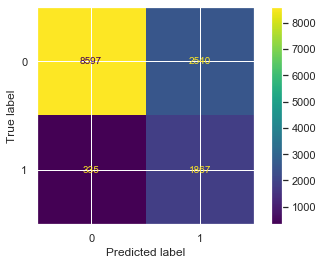

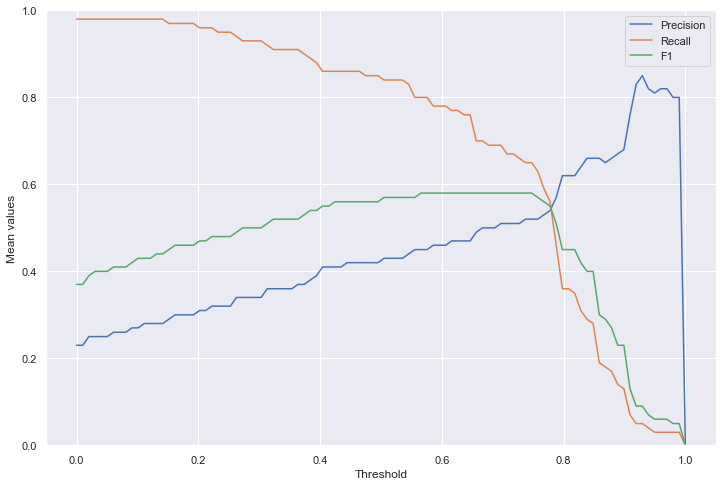

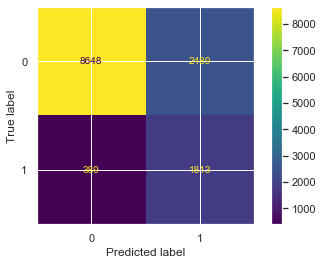

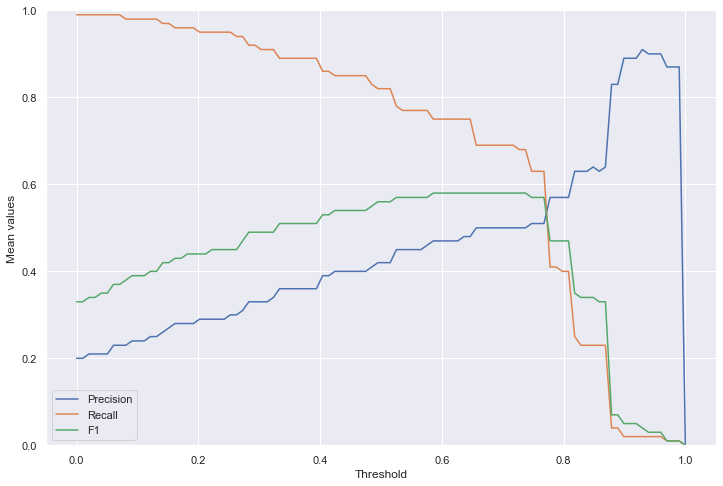

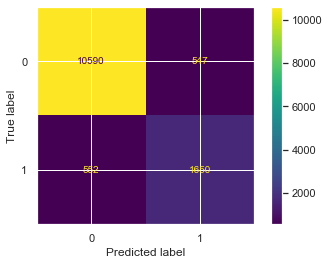

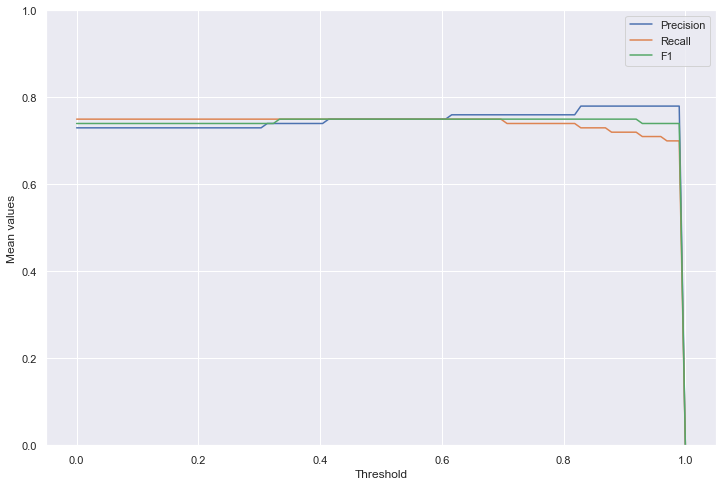

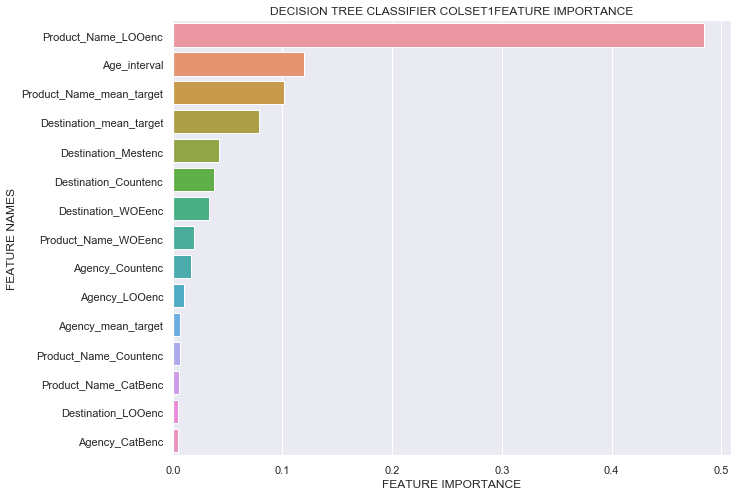

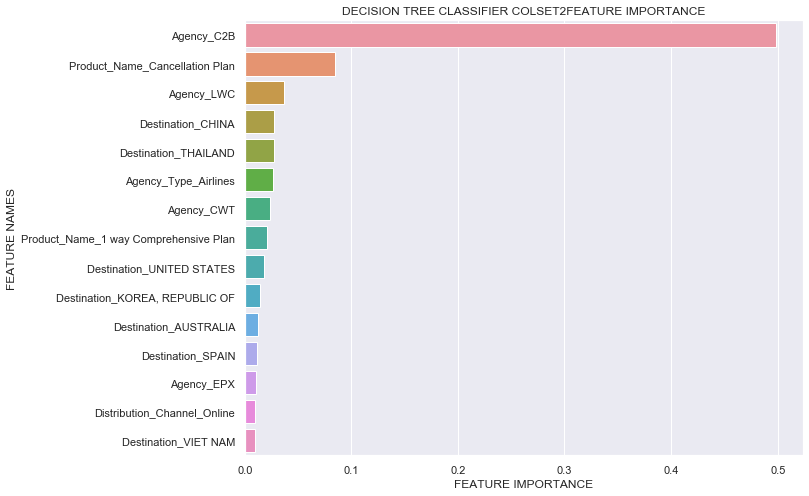

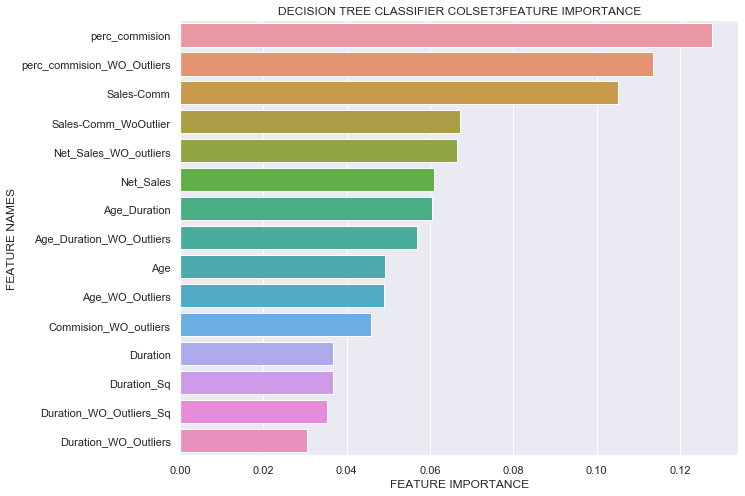

In [31]:
#Print model stats
print_stats("DECISION TREE Classifier - Colset1",y_test, y_pred1)
plot_confusion_matrix(clf1, X_tst1, y_test, values_format= 'd')
plot_pr_auc_threshold(y_test, y_pred1_prob)

print_stats("DECISION TREE Classifier - Colset2",y_test, y_pred2)
plot_confusion_matrix(clf2, X_tst2, y_test, values_format= 'd')
plot_pr_auc_threshold(y_test, y_pred2_prob)

print_stats("DECISION TREE Classifier - Colset3",y_test, y_pred3)
plot_confusion_matrix(clf3, X_tst3, y_test, values_format= 'd')
plot_pr_auc_threshold(y_test, y_pred3_prob)


#Plot Feature Importance
plot_feature_importance(clf1.feature_importances_,X_trn1.columns,'DECISION TREE CLASSIFIER COLSET1',15)
plot_feature_importance(clf2.feature_importances_,X_trn2.columns,'DECISION TREE CLASSIFIER COLSET2',15)
plot_feature_importance(clf3.feature_importances_,X_trn3.columns,'DECISION TREE CLASSIFIER COLSET3',15)


In [32]:
th=0.85

In [33]:
print_stats_threshold("DECISION TREE Classifier - Colset1",y_test, y_pred1_prob,th)
print_stats_threshold("DECISION TREE Classifier - Colset2",y_test, y_pred2_prob,th)
print_stats_threshold("DECISION TREE Classifier - Colset3",y_test, y_pred3_prob,th)

---------- DECISION TREE Classifier - Colset1 ----------
Mean squared error is  0.14198965439688133
R2 score is  -0.030190908588982213
AUC : 0.628595454335268
Accuracy : 0.8580103456031187
Precision : 0.6617647058823529
Recall : 0.28610354223433243
F1 score : 0.3994927076727965

Confusion Matrix: 
 [[10815   322]
 [ 1572   630]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     11137
           1       0.66      0.29      0.40      2202

    accuracy                           0.86     13339
   macro avg       0.77      0.63      0.66     13339
weighted avg       0.84      0.86      0.83     13339

---------- DECISION TREE Classifier - Colset2 ----------
Mean squared error is  0.14881175500412325
R2 score is  -0.07968793745994174
AUC : 0.6031959770791278
Accuracy : 0.8511882449958768
Precision : 0.6341161928306551
Recall : 0.2329700272479564
F1 score : 0.3407505812022584

Confusion Matrix: 
 [[10841   296]
 

# Run models on validation set

In [34]:
#Predict validation set using fitted models
y_predval1 = clf1.predict(x_val1)
y_predval1_prob = clf1.predict_proba(x_val1)[: ,1]

y_predval2 = clf2.predict(x_val2)
y_predval2_prob = clf2.predict_proba(x_val2)[: ,1]

y_predval3 = clf3.predict(x_val3)
y_predval3_prob = clf3.predict_proba(x_val3)[: ,1]


# Print model stats

---------- DECISION TREE Classifier - Colset1 Validation ----------
Mean squared error is  0.23066139926086401
R2 score is  -0.6396188040711939
AUC : 0.7997537524724607
Accuracy : 0.769338600739136
Precision : 0.41187248076218397
Recall : 0.8457486832204665
F1 score : 0.5539674716609168

Confusion Matrix: 
 [[4913 1605]
 [ 205 1124]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      6518
           1       0.41      0.85      0.55      1329

    accuracy                           0.77      7847
   macro avg       0.69      0.80      0.70      7847
weighted avg       0.87      0.77      0.80      7847



---------- DECISION TREE Classifier - Colset2 Validation ----------
Mean squared error is  0.22836752899197146
R2 score is  -0.6233132027047401
AUC : 0.787656500687683
Accuracy : 0.7716324710080286
Precision : 0.411674933231591
Recall : 0.8118886380737397
F1 score : 0.5463291139240507

Confusion Matrix: 
 [[4976 1542]
 [ 250 1079]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.76      0.85      6518
           1       0.41      0.81      0.55      1329

    accuracy                           0.77      7847
   macro avg       0.68      0.79      0.70      7847
weighted avg       0.86      0.77      0.80      7847



---------- DECISION TREE Classifier - Colset3 Valition ----------
Mean squared error is  0.08206958073148975
R2 score is  0.416621817777984
AUC : 0.853256918215252
Accuracy : 0.9179304192685103
Precision : 0.7588813303099018
Recall : 0.7554552294958615
F1 score : 0.7571644042232278

Confusion Matrix: 
 [[6199  319]
 [ 325 1004]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6518
           1       0.76      0.76      0.76      1329

    accuracy                           0.92      7847
   macro avg       0.85      0.85      0.85      7847
weighted avg       0.92      0.92      0.92      7847



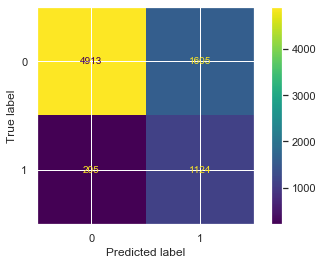

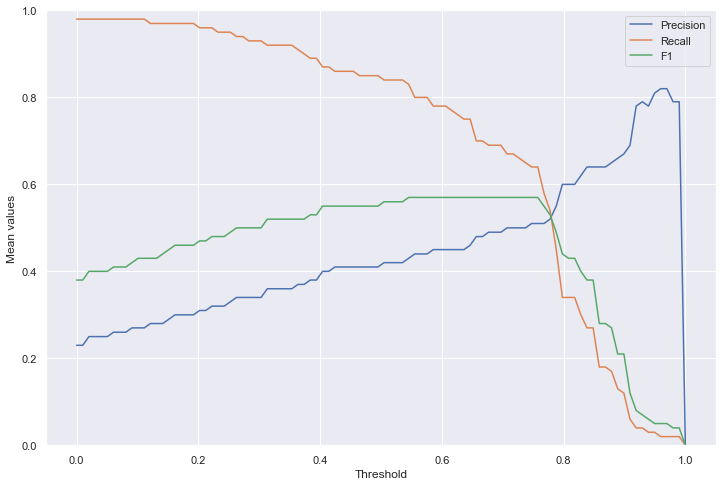

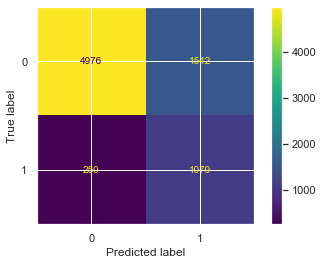

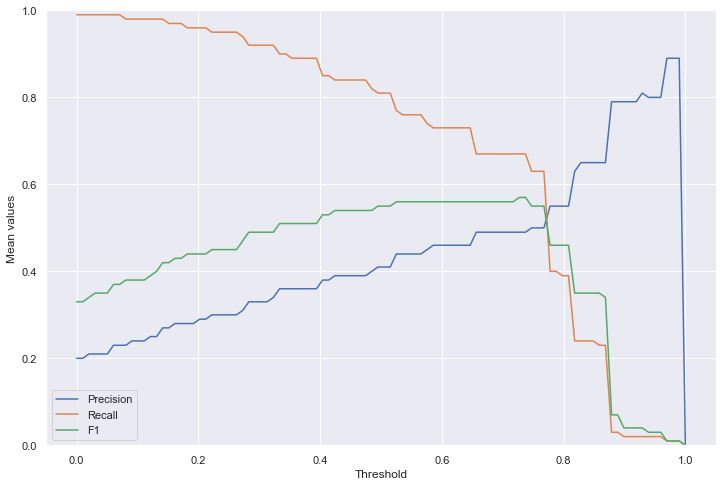

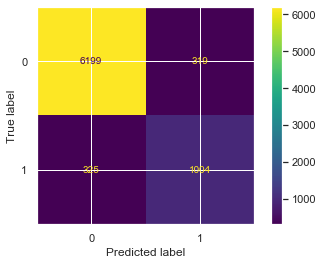

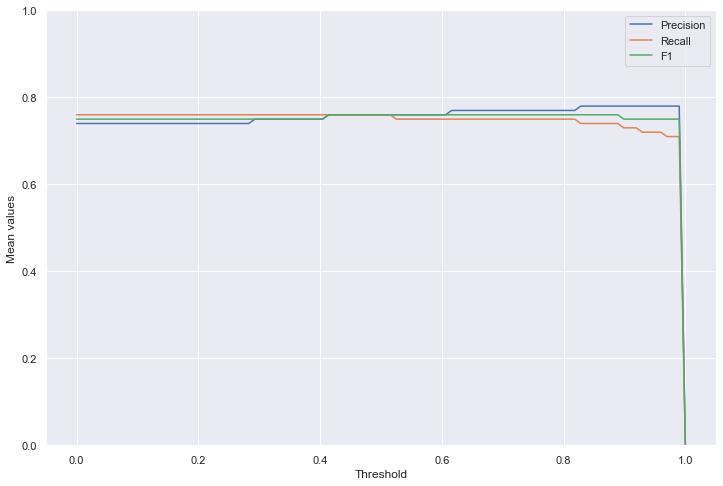

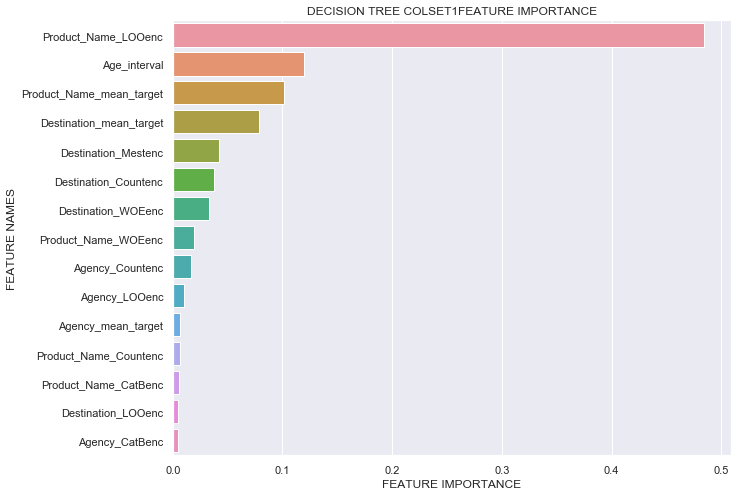

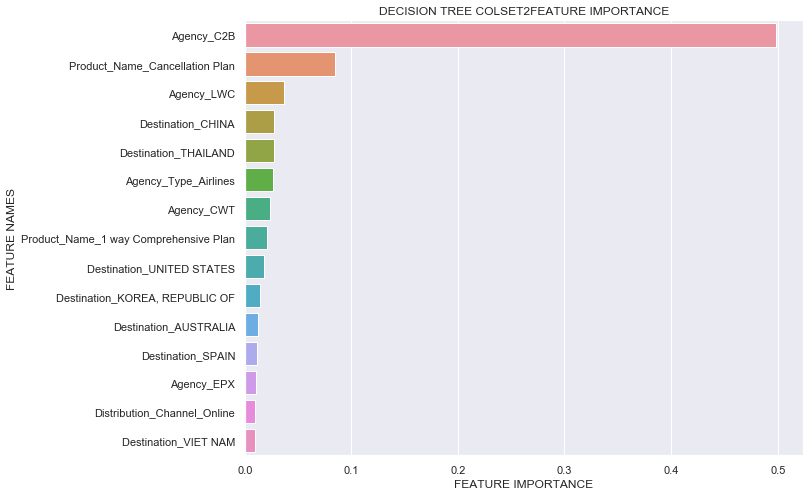

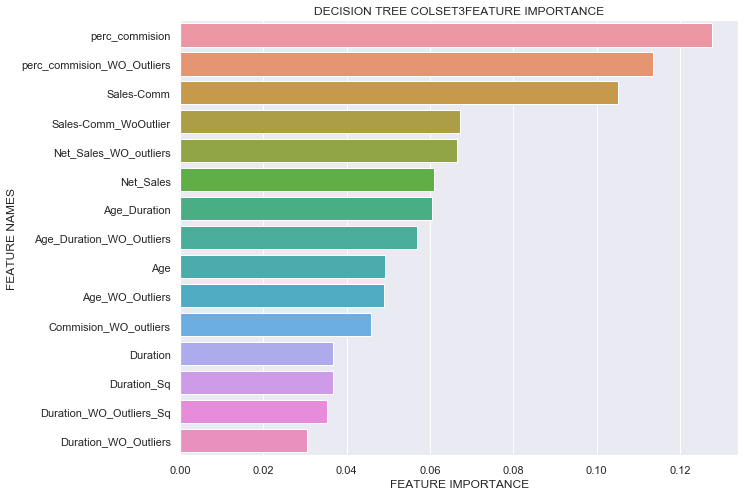

In [35]:
#Print model stats
print_stats("DECISION TREE Classifier - Colset1 Validation",y_val, y_predval1)
plot_confusion_matrix(clf1, x_val1, y_val, values_format= 'd')
plot_pr_auc_threshold(y_val, y_predval1_prob)

print_stats("DECISION TREE Classifier - Colset2 Validation",y_val, y_predval2)
plot_confusion_matrix(clf2, x_val2, y_val, values_format= 'd')
plot_pr_auc_threshold(y_val, y_predval2_prob)

print_stats("DECISION TREE Classifier - Colset3 Valition",y_val, y_predval3)
plot_confusion_matrix(clf3, x_val3, y_val, values_format= 'd')
plot_pr_auc_threshold(y_val, y_predval3_prob)


#Plot Feature Importance
plot_feature_importance(clf1.feature_importances_,x_val1.columns,'DECISION TREE COLSET1',15)
plot_feature_importance(clf2.feature_importances_,x_val2.columns,'DECISION TREE COLSET2',15)
plot_feature_importance(clf3.feature_importances_,x_val3.columns,'DECISION TREE COLSET3',15)


In [36]:
th=0.90

In [37]:
print_stats_threshold("DECISION TREE Classifier - Colset1",y_val, y_predval1_prob,th)
print_stats_threshold("DECISION TREE Classifier - Colset2",y_val, y_predval2_prob,th)
print_stats_threshold("DECISION TREE Classifier - Colset3",y_val, y_predval3_prob,th)

---------- DECISION TREE Classifier - Colset1 ----------
Mean squared error is  0.15878679750223015
R2 score is  -0.1287099612556395
AUC : 0.5569845246514197
Accuracy : 0.8412132024977699
Precision : 0.6627450980392157
Recall : 0.127163280662152
F1 score : 0.21338383838383837

Confusion Matrix: 
 [[6432   86]
 [1160  169]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      6518
           1       0.66      0.13      0.21      1329

    accuracy                           0.84      7847
   macro avg       0.75      0.56      0.56      7847
weighted avg       0.82      0.84      0.79      7847

---------- DECISION TREE Classifier - Colset2 ----------
Mean squared error is  0.16503122212310437
R2 score is  -0.17309743164209723
AUC : 0.5163857175279616
Accuracy : 0.8349687778768956
Precision : 0.7931034482758621
Recall : 0.0346124905944319
F1 score : 0.06633020908435472

Confusion Matrix: 
 [[6506   12]
 [1283  

# Save model results

In [38]:
#Save model results
RF_models = save_results(RF_models,str(clf1).replace('\n','')+' colset 1',y_test,y_pred1,y_val,y_predval1)
RF_models = save_results(RF_models,str(clf2).replace('\n','')+' colset 2',y_test,y_pred2,y_val,y_predval2)
RF_models = save_results(RF_models,str(clf3).replace('\n','')+' colset 3',y_test,y_pred3,y_val,y_predval3)

In [39]:
RF_models

,model,Trn Accuracy,Trn Precision,Trn Recall,Trn F1,Val Accuracy,Val Precision,Val Recall,Val F1
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 1",0.784467,0.423644,0.847866,0.564987,0.769339,0.411872,0.845749,0.553967
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 2",0.784242,0.421432,0.823342,0.557503,0.771632,0.411675,0.811889,0.546329
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 3",0.917610,0.751024,0.749319,0.750170,0.917930,0.758881,0.755455,0.757164


In [40]:
#Save model results with threshold
RF_models = save_results(RF_models,str(clf1).replace('\n','')+' colset 1 th='+str(th),y_test,y_pred1_prob>th,y_val,y_predval1_prob>th)
RF_models = save_results(RF_models,str(clf2).replace('\n','')+' colset 2 th='+str(th),y_test,y_pred2_prob>th,y_val,y_predval2_prob>th)
RF_models = save_results(RF_models,str(clf3).replace('\n','')+' colset 3 th='+str(th),y_test,y_pred3_prob>th,y_val,y_predval3_prob>th)

In [41]:
RF_models

,model,Trn Accuracy,Trn Precision,Trn Recall,Trn F1,Val Accuracy,Val Precision,Val Recall,Val F1
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 1",0.784467,0.423644,0.847866,0.564987,0.769339,0.411872,0.845749,0.553967
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 2",0.784242,0.421432,0.823342,0.557503,0.771632,0.411675,0.811889,0.546329
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 3",0.917610,0.751024,0.749319,0.750170,0.917930,0.758881,0.755455,0.757164
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 1 th=0.9",0.846765,0.674009,0.138965,0.230422,0.841213,0.662745,0.127163,0.213384
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 2 th=0.9",0.840018,0.833333,0.038601,0.073785,0.834969,0.793103,0.034612,0.066330
0,"DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy', max_depth=50, random_state=9) colset 3 th=0.9",0.920009,0.776964,0.722979,0.749000,0.920479,0.782226,0.735139,0.757952


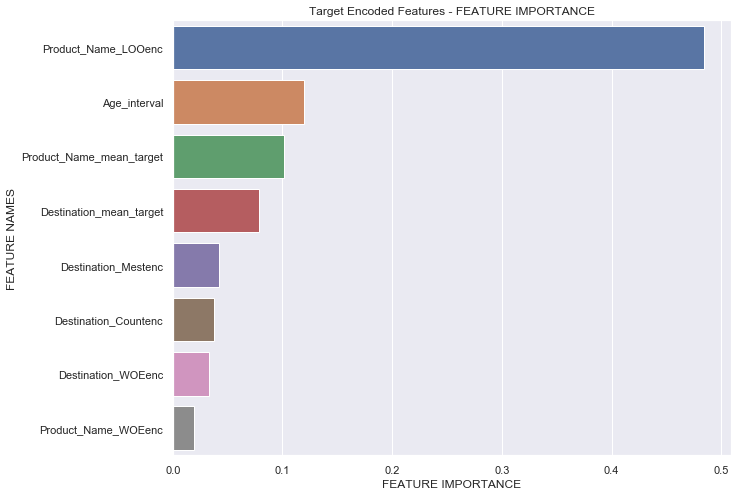

In [42]:
plot_feature_importance(clf1.feature_importances_,x_val1.columns,'Target Encoded Features - ',8)

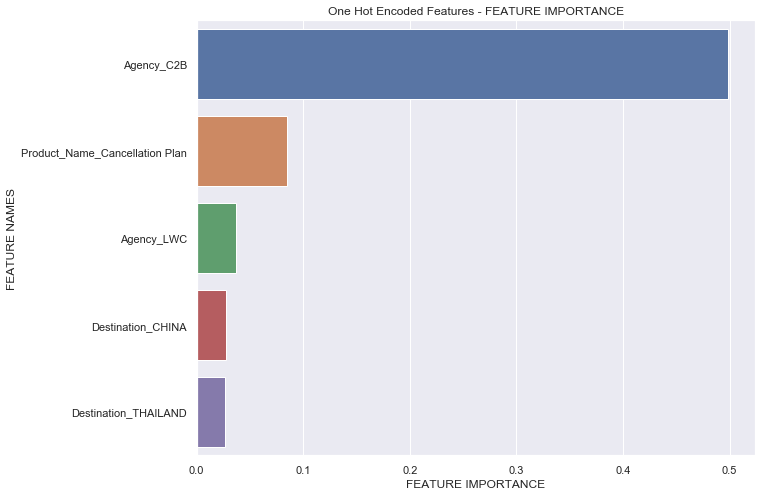

In [43]:
plot_feature_importance(clf2.feature_importances_,x_val2.columns,'One Hot Encoded Features - ',5)

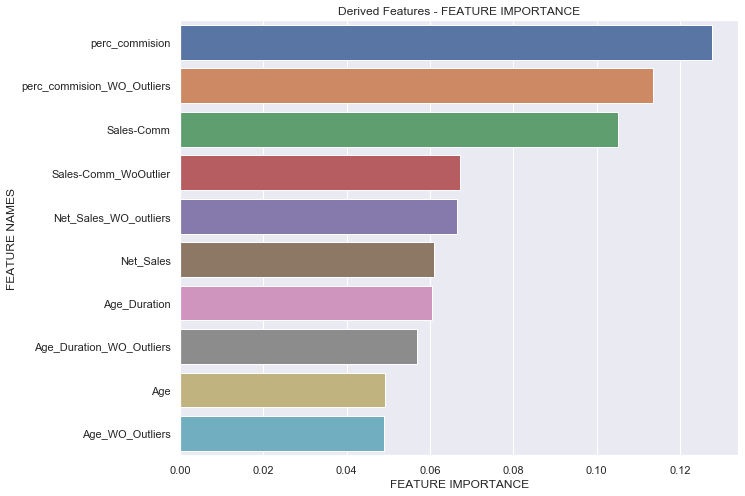

In [44]:
plot_feature_importance(clf3.feature_importances_,x_val3.columns,'Derived Features - ',10)

In [45]:

#Sort the DataFrame in order decreasing feature importance
df1 = pd.DataFrame({'feature_names':np.array(X_trn1.columns),'feature_importance':np.array(clf1.feature_importances_)}).sort_values(by=['feature_importance'], ascending=False)[:15]
df2 = pd.DataFrame({'feature_names':np.array(X_trn2.columns),'feature_importance':np.array(clf2.feature_importances_)}).sort_values(by=['feature_importance'], ascending=False)[:15]
df3 = pd.DataFrame({'feature_names':np.array(X_trn3.columns),'feature_importance':np.array(clf3.feature_importances_)}).sort_values(by=['feature_importance'], ascending=False)[:15]

df_all = pd.concat([df1,df2,df3]).sort_values(by=['feature_importance'], ascending=False)

df_all

df_all["feature_names"]

,feature_names,feature_importance
91,Agency_C2B,0.498567
31,Product_Name_LOOenc,0.484287
15,perc_commision,0.127620
0,Age_interval,0.120000
16,perc_commision_WO_Outliers,0.113646
13,Sales-Comm,0.105144
35,Product_Name_mean_target,0.101575
69,Product_Name_Cancellation Plan,0.084750
21,Destination_mean_target,0.078595
14,Sales-Comm_WoOutlier,0.067217


91     Agency_C2B                           
31     Product_Name_LOOenc                  
15     perc_commision                       
0      Age_interval                         
16     perc_commision_WO_Outliers           
13     Sales-Comm                           
35     Product_Name_mean_target             
69     Product_Name_Cancellation Plan       
21     Destination_mean_target              
14     Sales-Comm_WoOutlier                 
12     Net_Sales_WO_outliers                
11     Net_Sales                            
1      Age_Duration                         
2      Age_Duration_WO_Outliers             
0      Age                                  
3      Age_WO_Outliers                      
6      Commision_WO_outliers                
18     Destination_Mestenc                  
16     Destination_Countenc                 
7      Duration                             
9      Agency_LWC                           
8      Duration_Sq                          
10     Dur

In [72]:
#["'" + df_all["feature_names"] + "',"]

[91     'Agency_C2B',                           
 31     'Product_Name_LOOenc',                  
 15     'perc_commision',                       
 0      'Age_interval',                         
 16     'perc_commision_WO_Outliers',           
 13     'Sales-Comm',                           
 35     'Product_Name_mean_target',             
 69     'Product_Name_Cancellation Plan',       
 21     'Destination_mean_target',              
 14     'Sales-Comm_WoOutlier',                 
 12     'Net_Sales_WO_outliers',                
 11     'Net_Sales',                            
 1      'Age_Duration',                         
 2      'Age_Duration_WO_Outliers',             
 0      'Age',                                  
 3      'Age_WO_Outliers',                      
 6      'Commision_WO_outliers',                
 18     'Destination_Mestenc',                  
 16     'Destination_Countenc',                 
 7      'Duration',                             
 9      'Agency_LWC'

# Colset4: Combined Feature Set with best features

In [46]:
#Combined Feature Set with best features
colset4_X = [
'Agency_C2B',
'Product_Name_LOOenc',
'perc_commision',
'Age_interval',
'perc_commision_WO_Outliers',
'Sales-Comm',
'Product_Name_mean_target',
'Product_Name_Cancellation Plan',
'Destination_mean_target',
'Sales-Comm_WoOutlier',
'Net_Sales_WO_outliers',
'Net_Sales',
'Age_Duration',
'Age_Duration_WO_Outliers',
'Age',
'Age_WO_Outliers',
'Commision_WO_outliers',
'Destination_Mestenc',
'Destination_Countenc',
'Duration',
'Agency_LWC',
'Duration_Sq',
'Duration_WO_Outliers_Sq',
'Destination_WOEenc',
'Duration_WO_Outliers',
'Destination_CHINA',
'Destination_THAILAND',
'Agency_Type_Airlines',
'Agency_CWT',
'Product_Name_1 way Comprehensive Plan',
'Product_Name_WOEenc',
'Destination_UNITED STATES',
'Agency_Countenc',
'Destination_KOREA, REPUBLIC OF',
'Destination_AUSTRALIA',
'Destination_SPAIN',
'Agency_EPX',
'Agency_LOOenc',
'Distribution_Channel_Online',
'Destination_VIET NAM',
'Agency_mean_target',
'Product_Name_Countenc',
'Product_Name_CatBenc',
'Destination_LOOenc',
'Agency_CatBenc'
#'Claim'
]

In [47]:
#Combined Feature Set with best features Xy
colset4_Xy = [
'Agency_C2B',
'Product_Name_LOOenc',
'perc_commision',
'Age_interval',
'perc_commision_WO_Outliers',
'Sales-Comm',
'Product_Name_mean_target',
'Product_Name_Cancellation Plan',
'Destination_mean_target',
'Sales-Comm_WoOutlier',
'Net_Sales_WO_outliers',
'Net_Sales',
'Age_Duration',
'Age_Duration_WO_Outliers',
'Age',
'Age_WO_Outliers',
'Commision_WO_outliers',
'Destination_Mestenc',
'Destination_Countenc',
'Duration',
'Agency_LWC',
'Duration_Sq',
'Duration_WO_Outliers_Sq',
'Destination_WOEenc',
'Duration_WO_Outliers',
'Destination_CHINA',
'Destination_THAILAND',
'Agency_Type_Airlines',
'Agency_CWT',
'Product_Name_1 way Comprehensive Plan',
'Product_Name_WOEenc',
'Destination_UNITED STATES',
'Agency_Countenc',
'Destination_KOREA, REPUBLIC OF',
'Destination_AUSTRALIA',
'Destination_SPAIN',
'Agency_EPX',
'Agency_LOOenc',
'Distribution_Channel_Online',
'Destination_VIET NAM',
'Agency_mean_target',
'Product_Name_Countenc',
'Product_Name_CatBenc',
'Destination_LOOenc',
'Agency_CatBenc',
'Claim'
]

In [48]:
#Initialise training data
trainXy = data_train_Xy

X_trn = trainXy.iloc[:,:-1]
y_trn = trainXy.iloc[:,-1]

# Split training data in train1 and test1
x_train, x_test, y_train, y_test = train_test_split(X_trn, y_trn, test_size=0.3, random_state =43)

X_trn1 = x_train[colset1_X]
X_tst1 = x_test[colset1_X]

X_trn2 = x_train[colset2_X]
X_tst2 = x_test[colset2_X]

X_trn3 = x_train[colset3_X]
X_tst3 = x_test[colset3_X]

X_trn4 = x_train[colset4_X]
X_tst4 = x_test[colset4_X]

X_train_list = [X_trn1, X_trn2, X_trn3, X_trn4]
X_test_list = [X_tst1, X_tst2, X_tst3, X_tst4]

# Initialise validation data
valXy = data_val_Xy

x_val1 = data_val_Xy[colset1_X]
x_val2 = data_val_Xy[colset2_X]
x_val3 = data_val_Xy[colset3_X]
x_val4 = data_val_Xy[colset4_X]

X_val_list = [x_val1, x_val2, x_val3, x_val4]

y_val = data_val_Xy.iloc[:,-1]

# Initialise test submission data 
testX1 = data_test_x[colset1_X]
testX2 = data_test_x[colset2_X]
testX3 = data_test_x[colset3_X]
testX4 = data_test_x[colset4_X]

X_submit_list = [testX1, testX2, testX3, testX4]

In [49]:
cw = class_weight = {0:.16, 1:.84}

# Train Decision Tree on colset4

DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, criterion='entropy',
                       max_depth=50, random_state=9)

---------- Decision Tree - Colset4 ----------
Mean squared error is  0.0786415773296349
R2 score is  0.42942435949849933
AUC : 0.8612727644316265
Accuracy : 0.921358422670365
Precision : 0.7567928730512249
Recall : 0.7715712988192552
F1 score : 0.7641106363840792

Confusion Matrix: 
 [[10591   546]
 [  503  1699]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11137
           1       0.76      0.77      0.76      2202

    accuracy                           0.92     13339
   macro avg       0.86      0.86      0.86     13339
weighted avg       0.92      0.92      0.92     13339



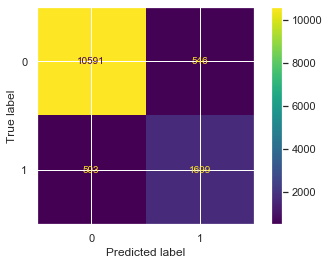

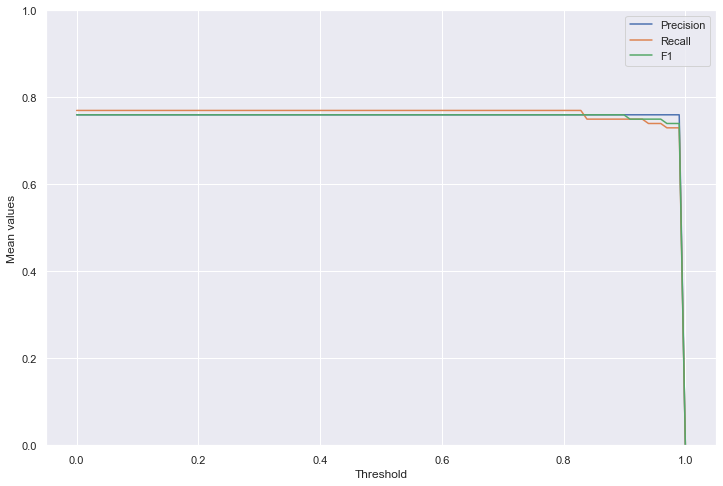

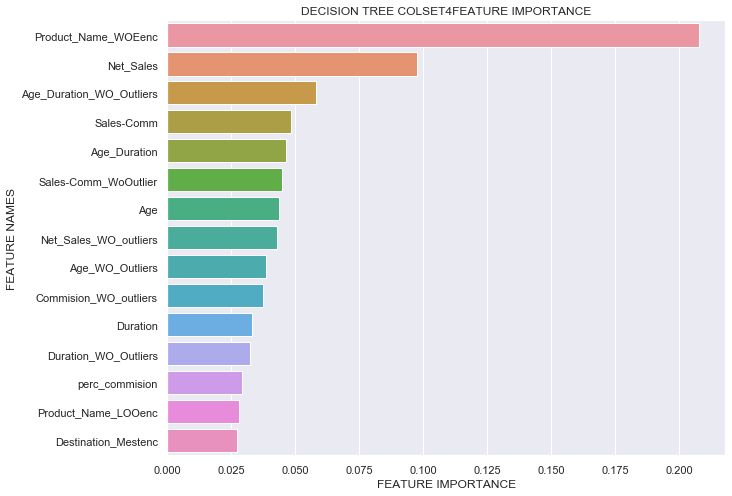

In [50]:
#Decision Tree model on combined Feature Set
clf4 = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=9,class_weight=cw)

#Fit the models on Train-Test sets of different feature colsets
clf4.fit(X_trn4,y_train)

#Predict using fitted models
y_pred4 = clf4.predict(X_tst4)
y_pred4_prob = clf4.predict_proba(X_tst4)[: ,1]

#Print model stats
print_stats("Decision Tree - Colset4",y_test, y_pred4)
plot_confusion_matrix(clf4, X_tst4, y_test, values_format= 'd')
plot_pr_auc_threshold(y_test, y_pred4_prob)

#Plot Feature Importance
plot_feature_importance(clf4.feature_importances_,X_trn4.columns,'DECISION TREE COLSET4',15)


In [51]:
print_stats_threshold("DECISION TREE Classifier - Colset4",y_test, y_pred4_prob,th)

---------- DECISION TREE Classifier - Colset4 ----------
Mean squared error is  0.08029087637753955
R2 score is  0.41745804482639914
AUC : 0.8531804002940179
Accuracy : 0.9197091236224605
Precision : 0.758337140246688
Recall : 0.7538601271571299
F1 score : 0.7560920063766797

Confusion Matrix: 
 [[10608   529]
 [  542  1660]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11137
           1       0.76      0.75      0.76      2202

    accuracy                           0.92     13339
   macro avg       0.85      0.85      0.85     13339
weighted avg       0.92      0.92      0.92     13339



# Evaluate model stats on validation set

---------- DECISION TREE - Colset4 Validation ----------
Mean squared error is  0.07467822097616923
R2 score is  0.46916208884766875
AUC : 0.8696866188232344
Accuracy : 0.9253217790238307
Precision : 0.7762081784386617
Recall : 0.7855530474040632
F1 score : 0.780852655198205

Confusion Matrix: 
 [[6217  301]
 [ 285 1044]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      6518
           1       0.78      0.79      0.78      1329

    accuracy                           0.93      7847
   macro avg       0.87      0.87      0.87      7847
weighted avg       0.93      0.93      0.93      7847



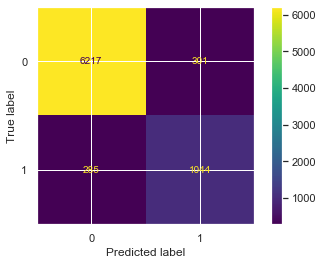

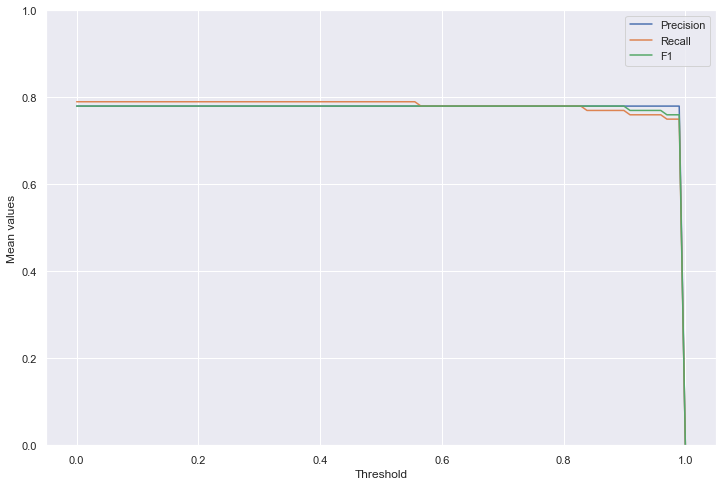

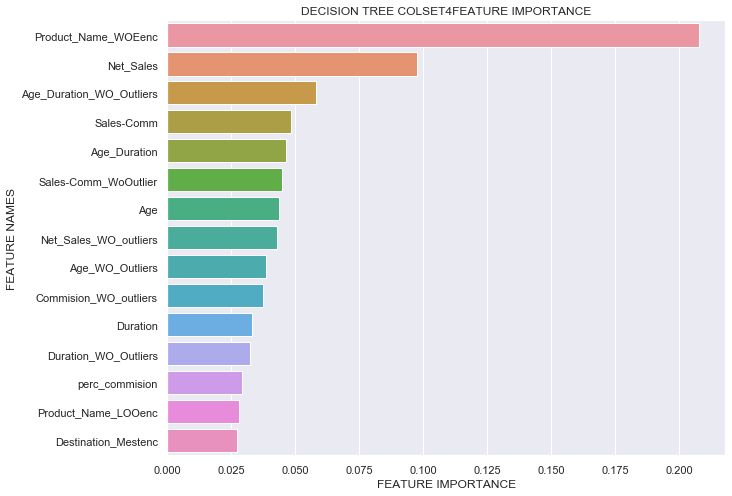

In [52]:
#Predict validation set using fitted models
y_predval4 = clf4.predict(x_val4)
y_predval4_prob = clf4.predict_proba(x_val4)[: ,1]

#Print model stats
print_stats("DECISION TREE - Colset4 Validation",y_val, y_predval4)
plot_confusion_matrix(clf4, x_val4, y_val, values_format= 'd')
plot_pr_auc_threshold(y_val, y_predval4_prob)

#Plot Feature Importance
plot_feature_importance(clf4.feature_importances_,x_val4.columns,'DECISION TREE COLSET4',15)


In [53]:
th=0.8

In [54]:
print_stats_threshold("DECISION TREE Classifier - Threshold:"+str(th),y_val, y_predval4_prob,th)

---------- DECISION TREE Classifier - Threshold:0.8 ----------
Mean squared error is  0.07467822097616923
R2 score is  0.46916208884766875
AUC : 0.8687880825939905
Accuracy : 0.9253217790238307
Precision : 0.777445855115758
Recall : 0.7832957110609481
F1 score : 0.780359820089955

Confusion Matrix: 
 [[6220  298]
 [ 288 1041]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      6518
           1       0.78      0.78      0.78      1329

    accuracy                           0.93      7847
   macro avg       0.87      0.87      0.87      7847
weighted avg       0.93      0.93      0.93      7847



# Save model evaluation scores

In [55]:
#Initialise results Data frame
RF_models = pd.DataFrame([{
                                         'model':"model",
                                         'Trn Accuracy':0,
                                         'Trn Precision':0,
                                         'Trn Recall':0,
                                         'Trn F1':0,
                                         'Val Accuracy':0,
                                         'Val Precision':0,
                                         'Val Recall':0,
                                         'Val F1':0}
                                      ])
RF_models.drop(0,axis=0,inplace=True)

RF_models

,model,Trn Accuracy,Trn Precision,Trn Recall,Trn F1,Val Accuracy,Val Precision,Val Recall,Val F1


In [66]:
th = 0.98

In [67]:
#Save model results with threshold
RF_models = save_results(RF_models,str(clf4).replace('\n','')+' colset 1 th='+str(th),y_test,y_pred4_prob>th,y_val,y_predval4_prob>th)
RF_models

,model,Trn Accuracy,Trn Precision,Trn Recall,Trn F1,Val Accuracy,Val Precision,Val Recall,Val F1
0,"DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, criterion='entropy', max_depth=50, random_state=9) colset 1 th=0.5",0.921358,0.756793,0.771571,0.764111,0.925322,0.776208,0.785553,0.780853
0,"DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, criterion='entropy', max_depth=50, random_state=9) colset 1 th=0.7",0.921358,0.757251,0.770663,0.763898,0.925322,0.776620,0.784801,0.780689
0,"DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, criterion='entropy', max_depth=50, random_state=9) colset 1 th=0.8",0.920909,0.757521,0.766122,0.761797,0.925322,0.777446,0.783296,0.780360
0,"DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, criterion='entropy', max_depth=50, random_state=9) colset 1 th=0.9",0.919709,0.758337,0.753860,0.756092,0.924302,0.779468,0.771257,0.775340
0,"DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, criterion='entropy', max_depth=50, random_state=9) colset 1 th=0.95",0.918585,0.758573,0.743415,0.750917,0.922773,0.779151,0.759217,0.769055
0,"DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, criterion='entropy', max_depth=50, random_state=9) colset 1 th=0.98",0.917010,0.756440,0.733424,0.744754,0.921499,0.777432,0.751693,0.764346


In [68]:
RF_models.to_csv("DTmodels.csv")